In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

## Loading and cleaning Data

Import and read the Uber Data.

In [3]:
# Reading the data in python
uber_df = pd.read_csv('Uber Request Data.csv')

uber_df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
# inspecting data and identifying total number of rows and for nulls in rows.
print(uber_df.shape)
print(uber_df.info())
uber_df.describe()


(6745, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None


,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


Request id and Driver id are floats but these are not numerical variables.

In [5]:
print(uber_df['Driver id'].unique())
uber_df.groupby('Status')['Driver id'].count()

# Driver id is only available for Status = Trip Completed and Cancelled.

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

Status
Cancelled            1264
No Cars Available       0
Trip Completed       2831
Name: Driver id, dtype: int64

### Metadata: 

1. Request id: Unique Identifier for each trip. Zero NaN.
2. Driver id: Driver id for a trip. Can be NaN when Status = No Cars Available.
   There are a total of 300 distinct Driver id. We can assume at any point of time there is a max of 300 cabs available from     Airport to City and City to Airport.There is high number of cancellations by the drivers.
3. Pickup point: 2 unique values Airport/ City. Zero NaN.
4. Status: 3 unique values. Zero NaN.
5. Request timestamp: Request time for the cab. Zero NaN.
6. Drop timestamp: Drop time for completed trips. NaN for Cancelled and No Cars Available Status.

In [6]:
# Data cleaning
# Changing the datatype from Object to datetime

uber_df['Request timestamp'] = pd.to_datetime(uber_df['Request timestamp'], infer_datetime_format= True, dayfirst=True)
uber_df['Drop timestamp'] = pd.to_datetime(uber_df['Drop timestamp'], infer_datetime_format = True, dayfirst=True)

In [7]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [8]:
# Creating new metrics for Analysis

# Request hour
uber_df['hour_of_day'] = uber_df['Request timestamp'].apply(lambda x: x.hour)

# Request day
uber_df['day'] = uber_df['Request timestamp'].apply(lambda x: x.day)

# Trip Duration
uber_df['trip_time'] = uber_df['Drop timestamp'] - uber_df['Request timestamp']

#Trip Status = 1 for completed, 0 = for other status
uber_df['trip_status'] = (uber_df['Status']=='Trip Completed').astype(int)

uber_df[['hour_of_day', 'day','trip_time']].describe()

# We can see that trip_time is upto ns in some rows and till seconds in some rows. 
# We dont want to change this as we only want precision upto seconds. 

,hour_of_day,day,trip_time
count,6745.000000,6745.000000,2831
mean,12.956709,13.010971,0 days 00:52:24.825150
std,6.504052,1.422743,0 days 00:13:51.041580
min,0.000000,11.000000,0 days 00:20:47
25%,7.000000,12.000000,0 days 00:41:00
50%,13.000000,13.000000,0 days 00:52:05
75%,19.000000,14.000000,0 days 01:04:00
max,23.000000,15.000000,0 days 01:23:00


In [9]:
# Identifying NaTs in trip time

uber_df[uber_df['trip_time'].isna()].head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour_of_day,day,trip_time,trip_status
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,6,13,NaT,0
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,17,14,NaT,0
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,20,14,NaT,0
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,10,15,NaT,0
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,19,12,NaT,0
2836,3806,Airport,2.0,Cancelled,2016-07-13 20:57:49,NaT,20,13,NaT,0
2837,4451,City,2.0,Cancelled,2016-07-14 08:38:38,NaT,8,14,NaT,0
2838,5023,Airport,2.0,Cancelled,2016-07-14 19:04:08,NaT,19,14,NaT,0
2839,80,City,3.0,Cancelled,2016-07-11 04:47:00,NaT,4,11,NaT,0
2840,534,City,3.0,Cancelled,2016-07-11 10:01:00,NaT,10,11,NaT,0


In [10]:
uber_df[uber_df['trip_time'].isna()]['Status'].unique()

array(['Cancelled', 'No Cars Available'], dtype=object)

In [11]:
# From above we can see that when the status is Cancelled and No Cars Available we dont have trip time 
# as drop timestamp is not availabe for such cases.

# Converting timedelta to float (minutes)
uber_df['trip_time'] = uber_df['trip_time'].apply(lambda x: x.seconds/60)

### Plots

Plotting data to identify trends and gather meaningful insight from it.

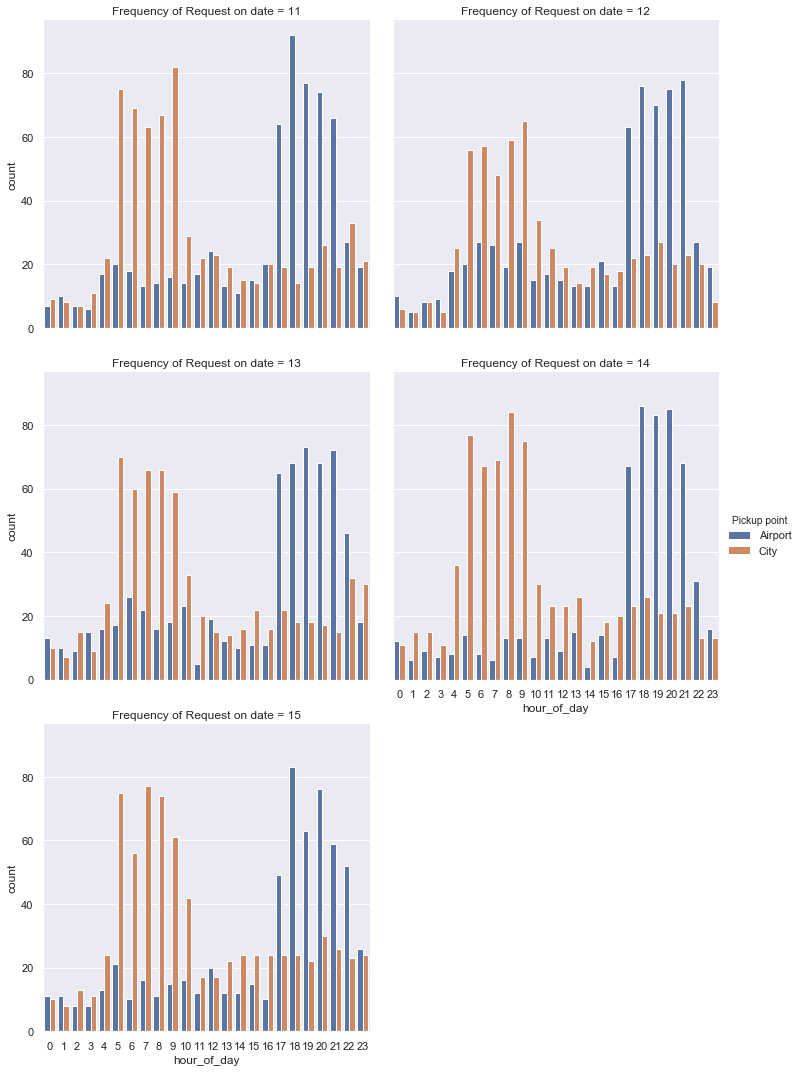

In [12]:
freq_day_plot =sns.catplot(x="hour_of_day", kind="count",data=uber_df, col="day" ,hue='Pickup point',col_wrap=2)
freq_day_plot.set_titles("Frequency of Request on date = {col_name}")
plt.show()

# From this plot we can see that there is a similar trend for requests for each day for both the pickup points.
# We can see that there is co-relation of requests with the hour of day. 
# Plotting using catplot as we are plotting counts of request for hour of day and that too for all days together and 
#color by Pickup point.

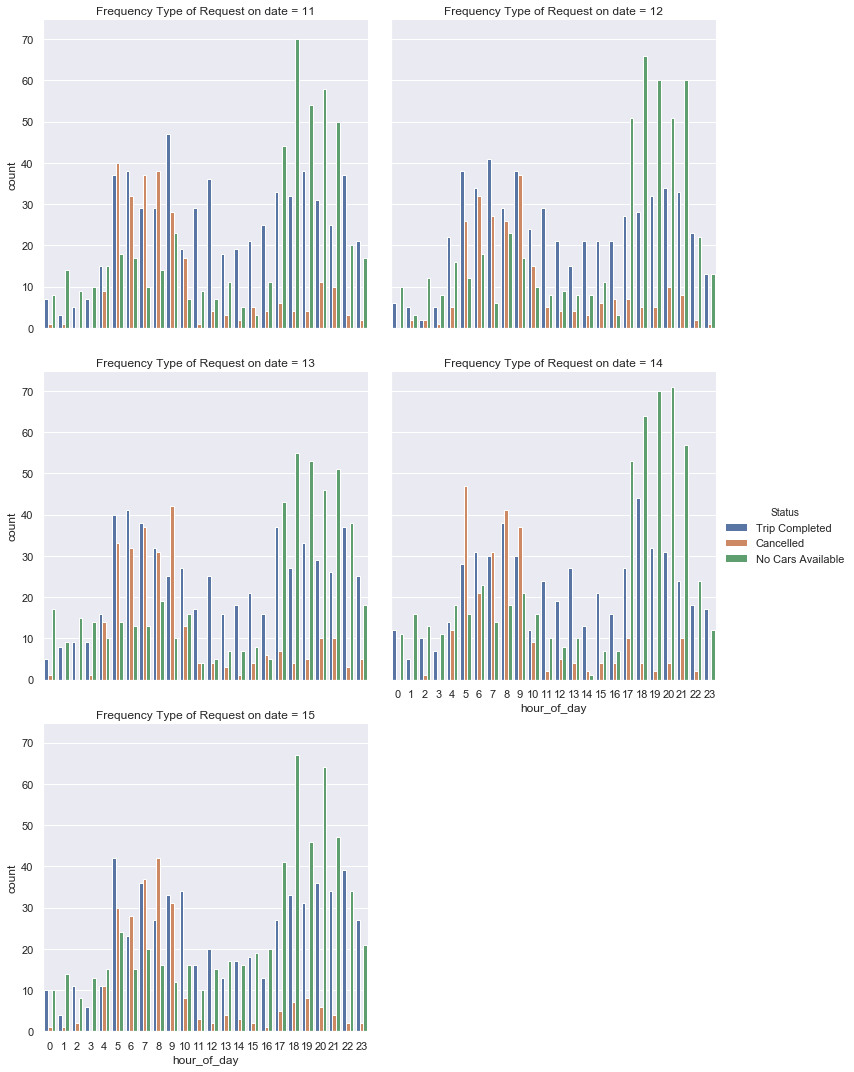

In [13]:
freq_req_plot =sns.catplot(x="hour_of_day", kind="count",data=uber_df, col="day" ,hue='Status',col_wrap=2)
freq_req_plot.set_titles("Frequency Type of Request on date = {col_name}")
plt.show()

# Plotting using catplot as we are plotting counts of request for hour of day and that too for all days together and 
#color by type of request.

Since above plot shows similar pattern across all days. So, we can take into account the aggregated requests for all days
for hour of day. 

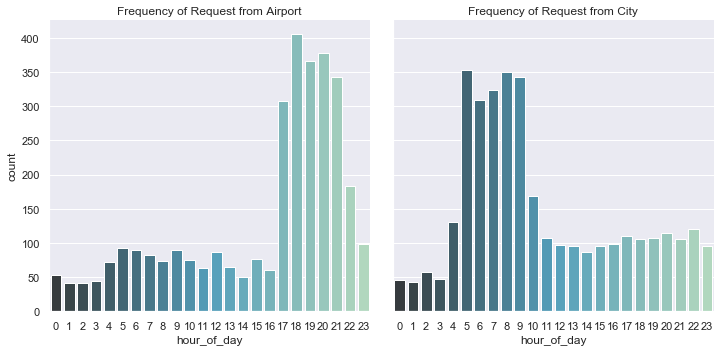

In [14]:
# Plotting the aggregated data for requests from 

pickup_plot = sns.catplot(x="hour_of_day", kind="count",data=uber_df, col='Pickup point', palette='GnBu_d')
pickup_plot.set_titles("Frequency of Request from {col_name}")
plt.show()

# Pattern of count is visible clearly in catplot.

From above graph we can bin the hour_of_day in some categories based on the number of requests.

In [15]:
# 5 AM -10 AM --- Morning
# 11 AM - 4 PM --- Afternoon
# 5 PM - 10 PM --- Evening
# 10 PM - 4 AM --- Night

# Creating a function to generate time_slots:

def time_slot(x):
    if (x > 4) and (x < 11):
        return('Morning')
    elif (x > 10) and (x < 17):
        return('Afternoon')
    elif (x > 16) and (x < 23):
        return('Evening')
    else :
        return ('Night')

In [16]:
# Creating timeslots based on request hour.

uber_df['time_slot'] = uber_df['hour_of_day'].apply(lambda x: time_slot(x))

# Not using pd.cut() as the bin for Night needs to be inclusive of hours 0,2,3,4 and 22, 23. The bins for pd.cut() needs to
# be continous increasing or decreasing.

#### Plotting Requests by Status and as per time slots.

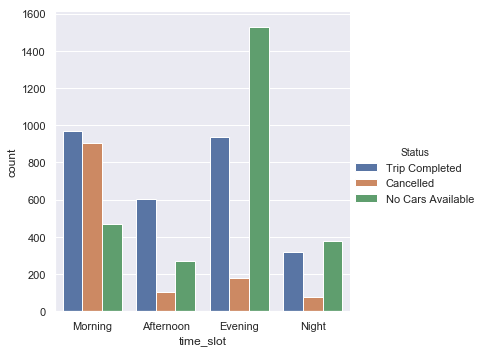

In [17]:
sns.catplot(x="time_slot", hue="Status", kind="count",data=uber_df, order=['Morning','Afternoon','Evening','Night'])
plt.show()

# Pattern of count is visible clearly in catplot.

Observations from Above Plots:
1. Sum of Cancelled and No Cars Available is higher than Completed trips.
2. During Morning hours there is high number of cancellations and no cars available.
3. During Afternoon hours there is high number of no cars available.
4. During Evening hours there is high number of no cars available.
5. During Night hours as well there is high number of no cars available.

Now we would see these charts based on pickup points to identify the pickup points where these problems are occuring.

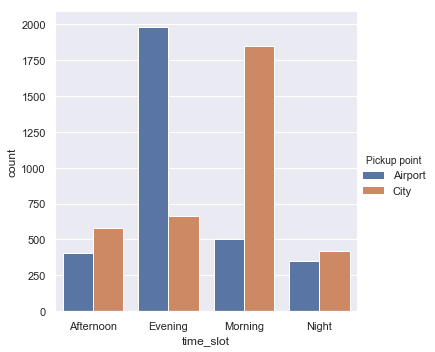

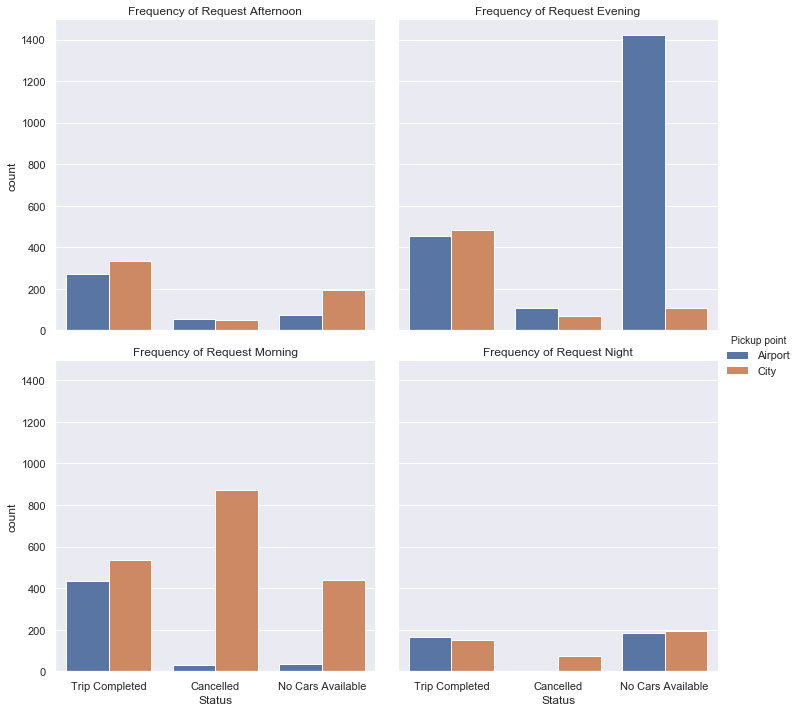

In [18]:
# Plotting number of requests based on status and Pickup points

sns.catplot(x="time_slot", kind="count",data=uber_df, hue='Pickup point')
plt.show()

freq_plot = sns.catplot(x="Status", kind="count",data=uber_df, hue='Pickup point', col= 'time_slot', col_wrap=2)
freq_plot.set_titles("Frequency of Request {col_name}")
plt.show()

# Pattern of count is visible clearly in catplot.

We will now see how much demand-supply gap exist during different time-slots of the day.
 

In [19]:
uber_df.describe()

,Request id,Driver id,hour_of_day,day,trip_time,trip_status
count,6745.000000,4095.000000,6745.000000,6745.000000,2831.000000,6745.000000
mean,3384.644922,149.501343,12.956709,13.010971,52.413753,0.419718
std,1955.099667,86.051994,6.504052,1.422743,13.850693,0.493549
min,1.000000,1.000000,0.000000,11.000000,20.783333,0.000000
25%,1691.000000,75.000000,7.000000,12.000000,41.000000,0.000000
50%,3387.000000,149.000000,13.000000,13.000000,52.083333,0.000000
75%,5080.000000,224.000000,19.000000,14.000000,64.000000,1.000000
max,6766.000000,300.000000,23.000000,15.000000,83.000000,1.000000


In [20]:
uber_df.groupby(['Pickup point','time_slot'])['trip_time'].agg(np.mean)

# Average trip time is almost same across different timeslots and for different pickup points.

Pickup point  time_slot
Airport       Afternoon    52.520316
              Evening      52.634805
              Morning      51.570498
              Night        52.443535
City          Afternoon    52.312902
              Evening      51.678625
              Morning      53.245265
              Night        53.583004
Name: trip_time, dtype: float64

##### Assumptions:
Demand : Total number of cab requests.

Supply : Number of completed trips.

In [21]:
demand_supply_time_slot = pd.pivot_table(uber_df, values='trip_status', index='time_slot', aggfunc=(np.sum,np.size))
demand_supply_time_slot.rename(columns={'size': 'Demand', 'sum': 'Supply'}, inplace=True)
demand_supply_time_slot

,Demand,Supply
time_slot,,
Afternoon,981,606
Evening,2646,938
Morning,2346,970
Night,772,317


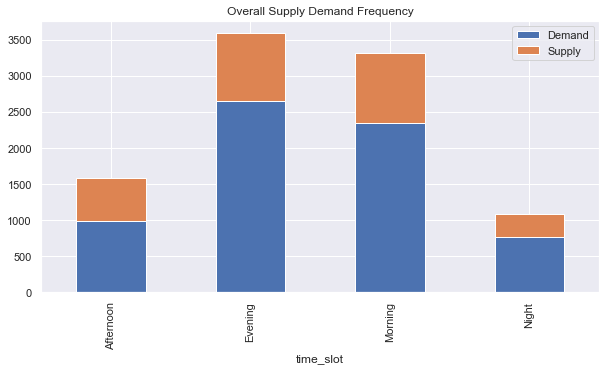

In [22]:
# Plotting demand and supply.

demand_supply_time_slot.plot( kind='bar', stacked=True, title='Overall Supply Demand Frequency', figsize=(10,5))
plt.show()

# Stacked bar charts are used to show propotion better.

In [23]:
# Demand and Supply based on Pickup point and time_slot.

demand_supply_df = pd.pivot_table(uber_df, values='trip_status', index=['Pickup point', 'time_slot'], aggfunc=(np.sum,np.size))
demand_supply_df.rename(columns={'size': 'Demand', 'sum': 'Supply'}, inplace=True)
demand_supply_df.reset_index(level=[0,1], inplace=True)
demand_supply_df

,Pickup point,time_slot,Demand,Supply
0,Airport,Afternoon,403,274
1,Airport,Evening,1983,453
2,Airport,Morning,501,435
3,Airport,Night,351,165
4,City,Afternoon,578,332
5,City,Evening,663,485
6,City,Morning,1845,535
7,City,Night,421,152


##### Observations:

Clearly during each time-slot demand is exceeding the supply which is a common trend. But some time slots have wide supply demand gap.


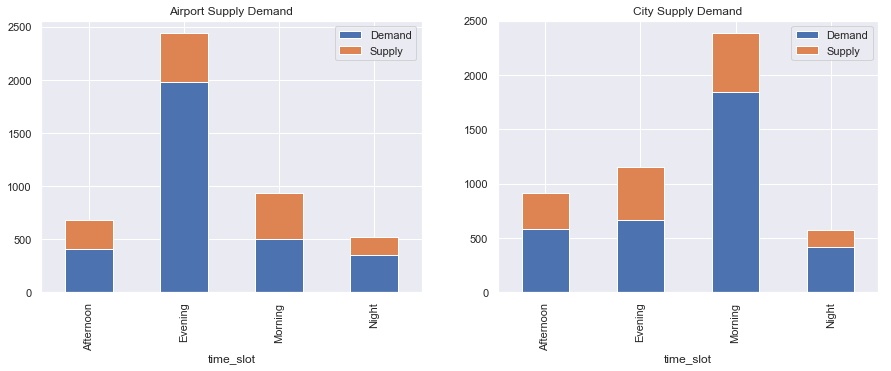

In [24]:
# Plotting Demand vs Supply for both Pickup points and for all time slots.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

demand_supply_df[demand_supply_df['Pickup point']=='Airport'].plot(x='time_slot' ,kind='bar', stacked=True, title='Airport Supply Demand', ax=ax1)
demand_supply_df[demand_supply_df['Pickup point']=='City'].plot(x='time_slot' ,kind='bar', stacked=True, title='City Supply Demand', ax=ax2)
plt.show()

# Stacked bar charts are used to show propotion better.

##### Observations:

Based on above dataframe and plots we can identify the peak hours as Evening and Morning slots.

Morning: 5-10 AM

Evening: 5-10 PM

During these timeslots there is high demand but supply is very less.

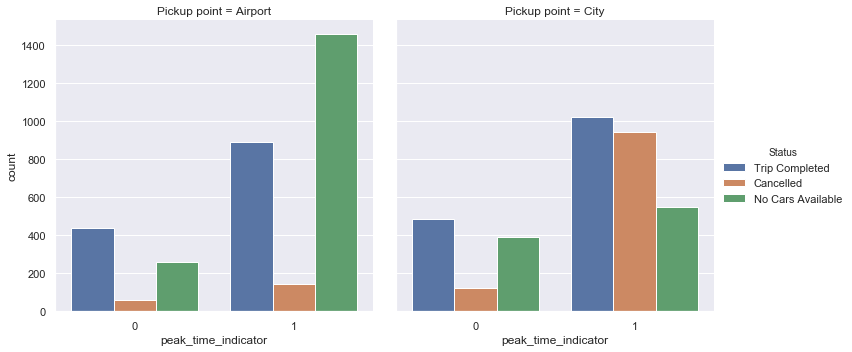

In [25]:
uber_df['peak_time_indicator'] = (uber_df['time_slot'].isin(['Morning','Evening'])).astype(int)

sns.catplot(x="peak_time_indicator", kind="count",data=uber_df, col='Pickup point',hue='Status')
plt.show()

# This graph shows Ride Status count for different pickup points based on whether it is Peak time or not.
# 1 = Peak Time
# 0 = Non Peak Hour

# Pattern of count is visible clearly in catplot.

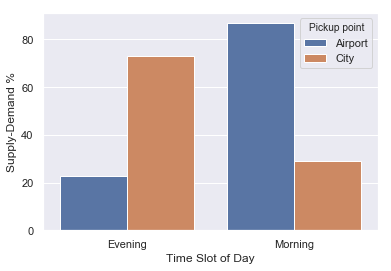

In [26]:
# Plotting Supply-Demand % 

demand_supply_df['supply_demand_%'] = demand_supply_df['Supply']/demand_supply_df['Demand']*100

demand_supply_df_peak = demand_supply_df[demand_supply_df['time_slot'].isin(['Morning','Evening'])]
ax = sns.barplot(x='time_slot', y='supply_demand_%', hue='Pickup point', data=demand_supply_df_peak)
ax.set(ylabel='Supply-Demand %', xlabel='Time Slot of Day')
plt.show()


In [27]:
demand_supply_df_peak['cabs_req_%'] = 100 -  demand_supply_df_peak['supply_demand_%']
demand_supply_df_peak

,Pickup point,time_slot,Demand,Supply,supply_demand_%,cabs_req_%
1,Airport,Evening,1983,453,22.844175,77.155825
2,Airport,Morning,501,435,86.826347,13.173653
5,City,Evening,663,485,73.152338,26.847662
6,City,Morning,1845,535,28.997290,71.002710


##### Observations and Inferences:

1. From Airport to City during evening hours there is high diffrence between supply and demand. From above plots we have seen that this is majorly due to no cars available at the airport.

2. From City to Airport during morning hours there is hign difference between supply and demand. From above plots we have seen that this is majorly due to Cancellations.

3. Average trip time from Airport to City and City to Airport is similar across different times of the day.

4. As there is high demand at Airport during Evening hours we can assume that there are many flights scheduled to land during this time.

5. As there is high demand for City to Airport during Morning hours we can assume that there are many flights scheduled to depart during this time.



In [28]:
# Average trips completed by drivers and required to complete to meet the demand.

trip_stats = pd.pivot_table(uber_df, values='trip_status', index='Pickup point', aggfunc=(np.sum,np.size))
trip_stats.rename(columns={'size': 'Required', 'sum': 'Completed'}, inplace=True)

# Finding the average

avg_trip_stats = trip_stats/uber_df['Driver id'].nunique()
avg_trip_stats

,Required,Completed
Pickup point,,
Airport,10.793333,4.423333
City,11.690000,5.013333


Drivers need to complete ~11 trips from Airport to City and ~12 trips from City to Airport over 5 days to meet the demand.

They are currently doing ~4 trips from Airport and ~5 trips from City.